In [21]:
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np
import matplotlib

headers = []
data = []

for i in range(1, 6):
    with fits.open("M13_000" + str(i) + ".fits") as hdul:
        headers.append(hdul[0].header)
        data.append(hdul[0].data)

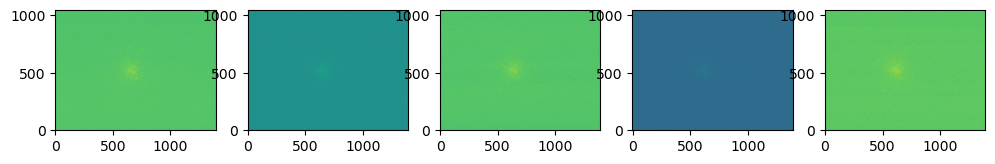

In [18]:
fig, axes = plt.subplots(1, 5, figsize=(12,12))

for i in range(5):
    axes[i].imshow(data[i], origin="lower")

plt.show()

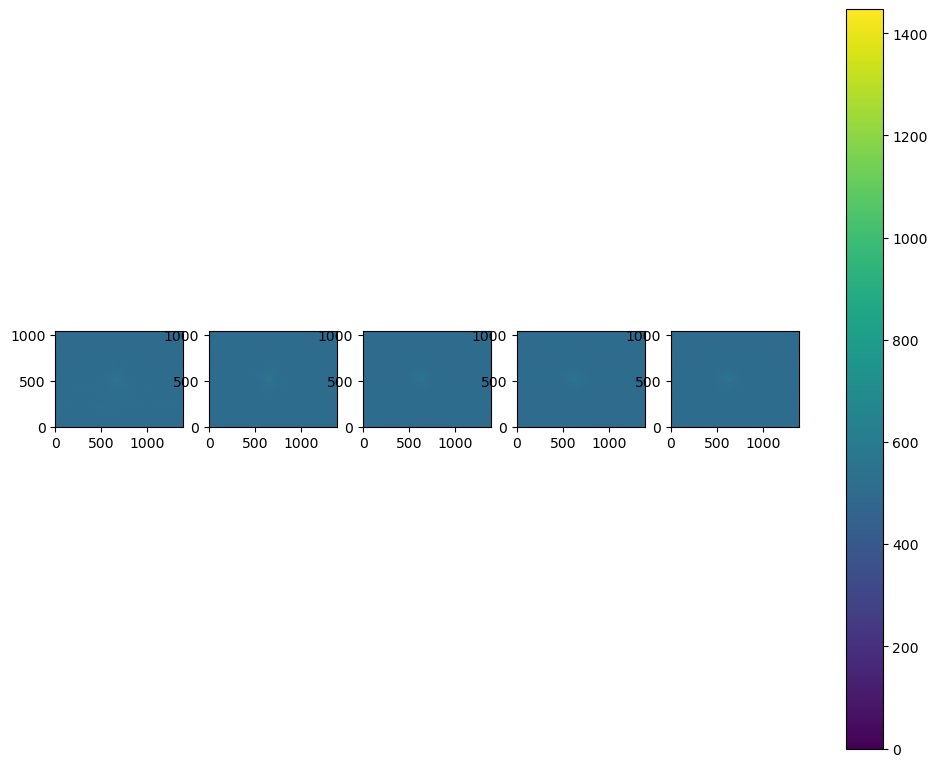

In [29]:
fig, axes = plt.subplots(1, 5, figsize=(12,12))

min_all = np.min([np.min(d) for d in data])
max_all = np.max([np.max(d) for d in data])

norm = matplotlib.colors.Normalize(vmin=min_all, vmax=max_all)

for i in range(5):
    img = axes[i].imshow(data[i], origin='lower', norm=norm)

cbar = fig.colorbar(img, ax=axes.ravel().tolist(), shrink=0.8)

plt.show()

#each of the images is much more similar once the different scaling is removed

30.388646955073444
30.28692006031181
30.173275716390485
30.18932204794162
30.16693934134345


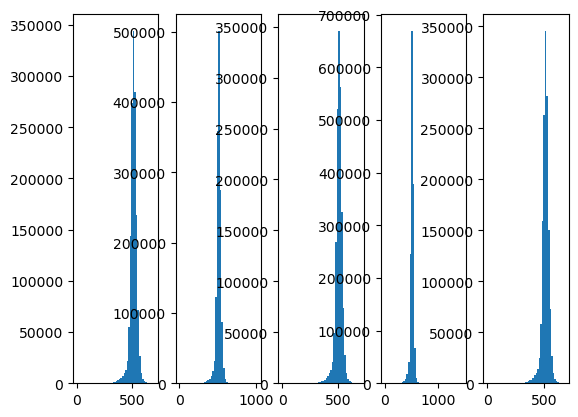

In [30]:
fig, axes = plt.subplots(1, 5)

for i in range(5):
    axes[i].hist(data[i].ravel(), bins=50)
    #Standard deviation of each image (answer for 3.3.2.d)
    print(np.std(data[i].ravel()))

plt.show()

#x-axis is intensity at each pixel, y-axis is the number of pixels at that intensity
#bins=50 means the data is divided into 50 ranges.  i.e. if 500 possible intensities, data sorted into multiples of 10
#Most of the data for intensity occurs at around 500


In [33]:
for i in range(5):
    vals = data[i].ravel()
    print("for image " + str(i+1) + ":")
    print("  Mean intensity:   ", np.mean(vals))
    print("  Median intensity: ", np.median(vals))

for image 1:
  Mean intensity:    510.4706668600796
  Median intensity:  512.0
for image 2:
  Mean intensity:    509.7460150033157
  Median intensity:  511.0
for image 3:
  Mean intensity:    508.0498729000884
  Median intensity:  510.0
for image 4:
  Mean intensity:    507.90583554376656
  Median intensity:  509.0
for image 5:
  Mean intensity:    508.7919920148099
  Median intensity:  510.0


510.0


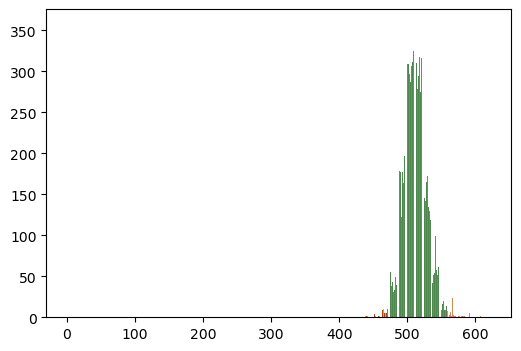

In [47]:
#combined median
print(np.median(np.median(data, axis=0)))
#combined histogram
plt.figure(figsize=(6,4))
all_data = (np.median(data, axis=0))
plt.hist(all_data, bins=50)
plt.show()

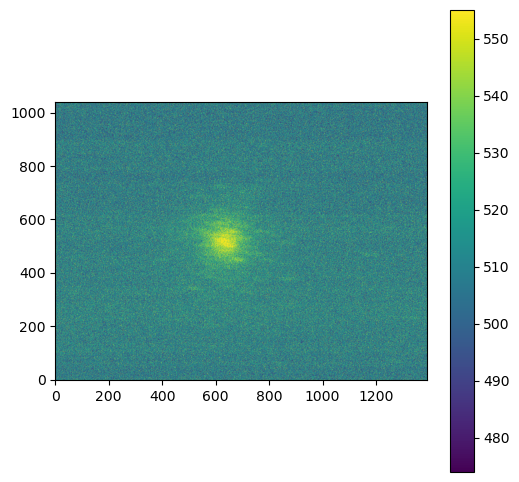

In [56]:
min_all = np.percentile(all_data, 1)
max_all = np.percentile(all_data, 99)

plt.figure(figsize=(6,6))
plt.imshow(all_data, origin="lower", vmin=min_all, vmax=max_all, cmap="viridis")
plt.colorbar()
plt.show()

#this image offers higher resolution and a more clear distribution of the star's light.  The small brighter points which aren't the star
#could also represent gas clouds.

In [57]:
fits.writeto("combined.fits", np.median(data, axis=0), overwrite=True)